[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  12 of 12 completed


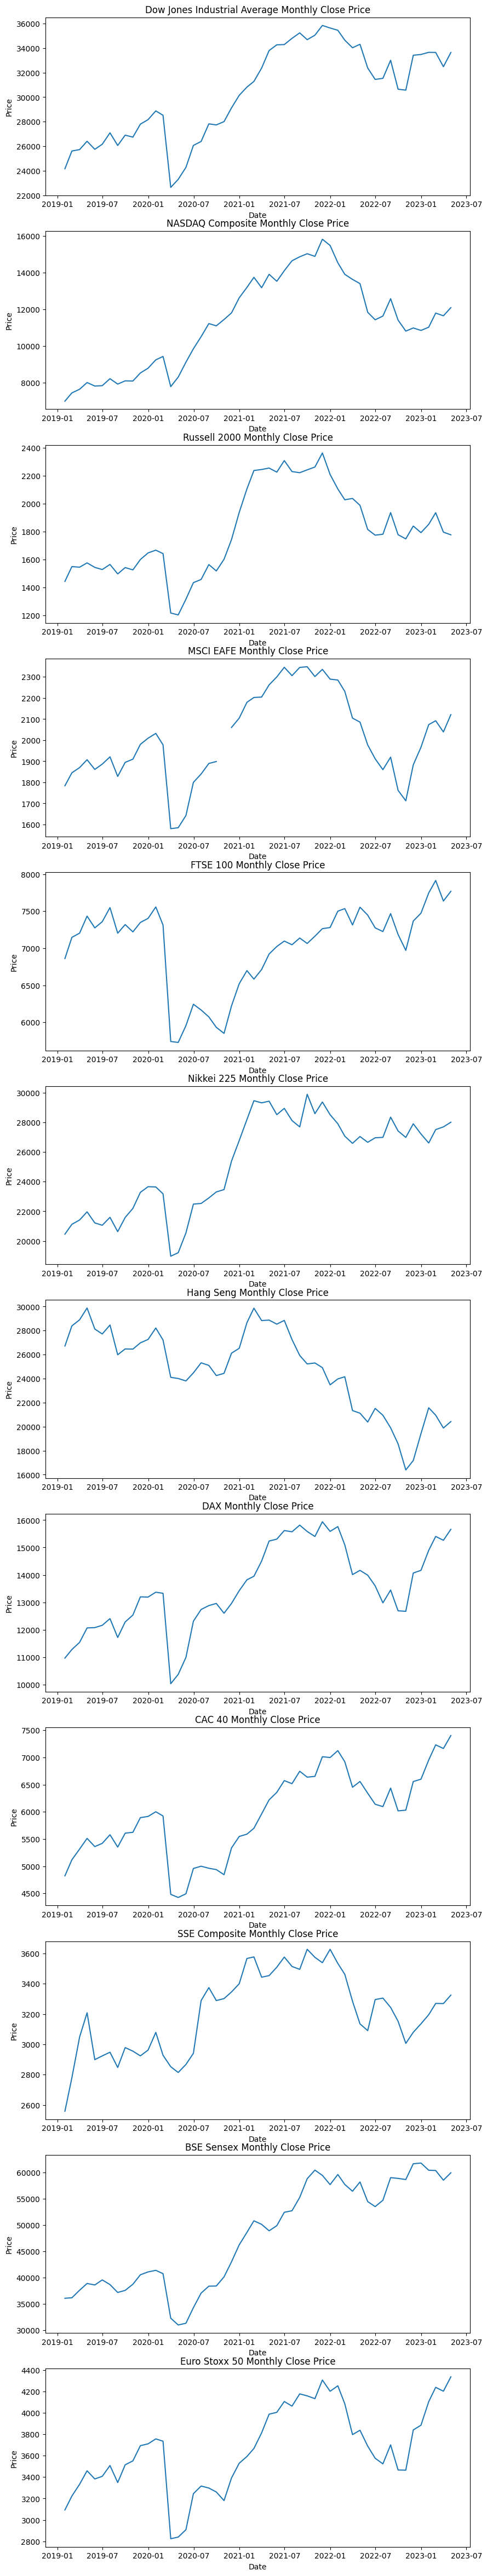

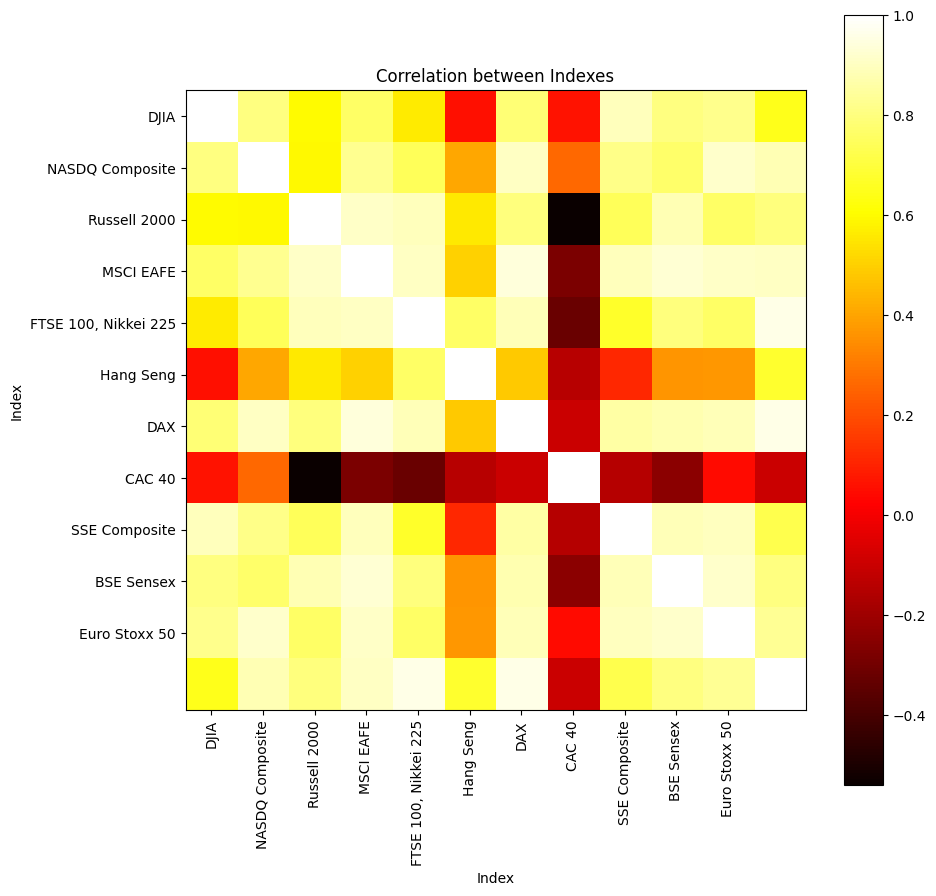

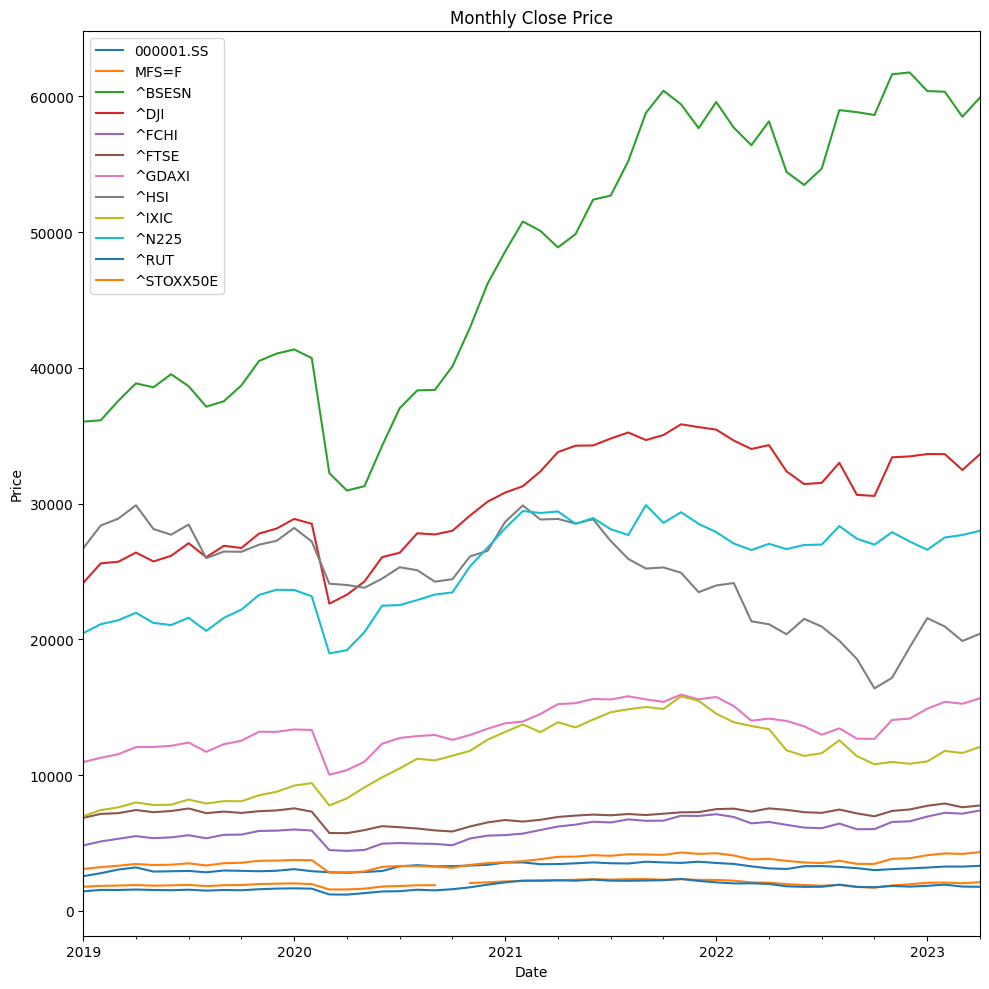

In [52]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

def plot_monthly_prices(plot, ticker, name=None):
    # Загрузка данных для индекса
    index = yf.download(ticker, start='2019-01-01')
    
    # Группировка данных по месяцам и вычисление средней цены закрытия
    index_monthly = index['Close'].resample('M').mean()
    
    # Построение графика цен закрытия по месяцам
    plot.plot(index_monthly)
    plot.set_title(f'{name} Monthly Close Price')
    plot.set_xlabel('Date')
    plot.set_ylabel('Price')

fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11, ax12) = plt.subplots(12, 1, figsize=(10, 60))

# Построение 12 графиков цен закрытия по месяцам для 12 индексов
plot_monthly_prices(ax1, '^DJI', 'Dow Jones Industrial Average') # DJIA - Dow Jones Industrial Average - индекс 30 крупнейших компаний США
plot_monthly_prices(ax2, '^IXIC', 'NASDAQ Composite')            # NASDAQ Composite - все компании, торгуемые на NASDAQ, включая технологические и биотехнологические компании
plot_monthly_prices(ax3, '^RUT', 'Russell 2000')                 # Russell 2000 - индекс 2000 мелких капитализаций компаний США
plot_monthly_prices(ax4, 'MFS=F', 'MSCI EAFE')                   # MSCI EAFE - индекс 21 крупнейших компаний Европы, Азии и Австралии
plot_monthly_prices(ax5, '^FTSE', 'FTSE 100')                    # FTSE 100 - индекс 100 крупнейших компаний Лондонской фондовой бирже
plot_monthly_prices(ax6, '^N225', 'Nikkei 225')                  # Nikkei 225 - индекс 225 крупнейших компаний Японии
plot_monthly_prices(ax7, '^HSI', 'Hang Seng')                    # Hang Seng - индекс 50 крупнейших компаний Гонконга
plot_monthly_prices(ax8, '^GDAXI', 'DAX')                        # DAX - индекс 30 крупнейших компаний Германии
plot_monthly_prices(ax9, '^FCHI', 'CAC 40')                      # CAC 40 - индекс 40 крупнейших компаний Франции
plot_monthly_prices(ax10, '000001.SS', 'SSE Composite')          # SSE Composite - индекс 50 крупнейших компаний Китая
plot_monthly_prices(ax11, '^BSESN', 'BSE Sensex')                # BSE Sensex - индекс 30 крупнейших компаний Индии
plot_monthly_prices(ax12, '^STOXX50E', 'Euro Stoxx 50')          # Euro Stoxx 50 - индекс 50 крупнейших компаний Европы

# Корреляция между индексами
index_data = yf.download(['^DJI', '^IXIC', '^RUT', 'MFS=F', '^FTSE', '^N225', '^HSI', '^GDAXI', '^FCHI', '000001.SS', '^BSESN', '^STOXX50E'], start='2019-01-01')
index_data = index_data['Close']

# Вычисление корреляции между индексами
index_corr = index_data.corr()

# Названия индексов
index_names = ['DJIA', 'NASDQ Composite', 'Russell 2000', 'MSCI EAFE', 'FTSE 100, Nikkei 225', 'Hang Seng', 'DAX', 'CAC 40', 'SSE Composite', 'BSE Sensex', 'Euro Stoxx 50']

# Построение тепловой карты корреляции с названиями
plt.figure(figsize=(10, 10))
plt.title('Correlation between Indexes')
plt.xlabel('Index')
plt.ylabel('Index')
plt.imshow(index_corr, cmap='hot', interpolation='none')
plt.colorbar()
plt.xticks(range(len(index_names)), index_names, rotation=90)
plt.yticks(range(len(index_names)), index_names)

# Общая тенденция цен закрытия по месяцам для всех индексов
index_monthly = index_data.resample('M').mean()
index_monthly.plot(figsize=(10, 10))
plt.title('Monthly Close Price')
plt.xlabel('Date')
plt.ylabel('Price')

plt.tight_layout()
plt.show()